In [1]:
%matplotlib inline
%autosave 20
import numpy as np
import pandas as pd
from datetime import datetime

Autosaving every 20 seconds


Get the data

In [ ]:
# https://www.consumerfinance.gov/data-research/consumer-complaints/
url="https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD"
DATA = pd.read_csv(url)
DATA.shape

Changing variable names and creating date-time format

In [4]:
DATA.rename(columns={"Date received": "DATE","Product":"PRODUCT", "Sub-product":"SUB_PRODUCT", "Issue":"ISSUE", 
"Sub-issue":"SUB_ISSUE","Consumer complaint narrative": "NARRATIVE","Company public response": "COMP_PUB_RESPONSE",
"ZIP code":"ZIP", "Consumer consent provided?":"CONSENT","Submitted via":"VIA", 
"Company response to consumer":"COMPANY_RESPONSE","Timely response?": "TIMELY_RESPONSE",
"Consumer disputed?":"CONSUMER_DISPUTED","Complaint ID":"COMPLAINT_ID"}, inplace=True)
DATA.DATE=pd.to_datetime(DATA.DATE)
DATA.sort_values(by=["DATE"], inplace=True)
DATA["YEAR"]=DATA.DATE.dt.year
DATA["Month"]=DATA.DATE.dt.month
DATA["DAY"]=DATA.DATE.dt.day

Let's check product types we want to classify

In [5]:
DATA.PRODUCT.value_counts(dropna=False)

Mortgage                                                                        258566
Debt collection                                                                 204576
Credit reporting                                                                140433
Credit reporting, credit repair services, or other personal consumer reports    126968
Credit card                                                                      89191
Bank account or service                                                          86206
Student loan                                                                     44260
Consumer Loan                                                                    31605
Credit card or prepaid card                                                      26897
Checking or savings account                                                      22375
Vehicle loan or lease                                                             6591
Money transfer, virtual currency, or money 

Text(0.5,1,'Product Types')

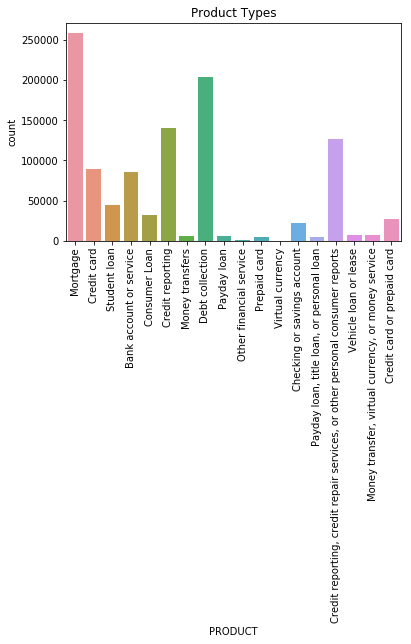

In [6]:
sns.countplot(x="PRODUCT", data=DATA)
plt.xticks(rotation=90)
plt.title('Product Types')

It is highly imbalanced. We can still proceed with these classes but the resulting performance will be poor. The model 
will be biased toward dominant categories. What we can do is reorganizing our outcome variable by making the class sizes
more comparable. Let's create a new variable. Never modify the original variable! You may want to go back and change things.

In [7]:
DATA.loc[DATA.PRODUCT=="Payday loan, title loan, or personal loan", "PRO_TYPE"]="LOAN_RELATED"
DATA.loc[DATA.PRODUCT=="Payday loan", "PRO_TYPE"]="LOAN_RELATED"
DATA.loc[DATA.PRODUCT=="Vehicle loan or lease","PRO_TYPE"]="LOAN_RELATED"
DATA.loc[DATA.PRODUCT=="Consumer Loan","PRO_TYPE"]="LOAN_RELATED"
DATA.loc[DATA.PRODUCT=="Student loan","PRO_TYPE"]="LOAN_RELATED"

DATA.loc[DATA.PRODUCT=="Credit reporting, credit repair services, or other personal consumer reports","PRO_TYPE"]="CREDIT_REPORT"
DATA.loc[DATA.PRODUCT=="Credit reporting", "PRO_TYPE"]="CREDIT_REPORT"

DATA.loc[DATA.PRODUCT=="Credit card","PRO_TYPE"]="CARD_RELATED"
DATA.loc[DATA.PRODUCT=="Credit card or prepaid card", "PRO_TYPE"]="CARD_RELATED"
DATA.loc[DATA.PRODUCT=="Prepaid card", "PRO_TYPE"]="CARD_RELATED"

DATA.loc[DATA.PRODUCT=="Mortgage", "PRO_TYPE"]="MORTGAGE"
DATA.loc[(DATA.PRODUCT=="Debt collection") & (DATA.SUB_PRODUCT=="Mortgage"), "PRO_TYPE"]="MORTGAGE"

DATA.loc[DATA.PRODUCT=="Bank account or service", "PRO_TYPE"]="SERVICE_RELATED"
DATA.loc[DATA.PRODUCT=="Virtual currency", "PRO_TYPE"]="SERVICE_RELATED"
DATA.loc[DATA.PRODUCT=="Other financial service", "PRO_TYPE"]="SERVICE_RELATED"
DATA.loc[DATA.PRODUCT=="Money transfers", "PRO_TYPE"]="SERVICE_RELATED"
DATA.loc[DATA.PRODUCT=="Money transfer, virtual currency, or money service", "PRO_TYPE"]="SERVICE_RELATED"
DATA.loc[DATA.PRODUCT=="Checking or savings account", "PRO_TYPE"]="SERVICE_RELATED"

DATA.loc[DATA.PRODUCT=="Debt collection", "PRO_TYPE"]="DEBT_COLLECTION"

In [8]:
# What we just did is re-organizing similar themes in the same category.
DATA.PRO_TYPE.value_counts(dropna=False)

CREDIT_REPORT      267401
MORTGAGE           258566
DEBT_COLLECTION    204576
SERVICE_RELATED    121492
CARD_RELATED       119907
LOAN_RELATED        92990
Name: PRO_TYPE, dtype: int64

Text(0.5,1,'Product Types')

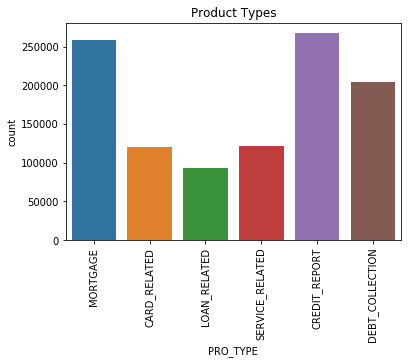

In [9]:
sns.countplot(x="PRO_TYPE", data=DATA)
plt.xticks(rotation=90)
plt.title('Product Types')

Still not super-balanced but way better than the previous version

In [10]:
DATA.to_csv("DATA_GITHUB.csv")

# Some Data Exploration

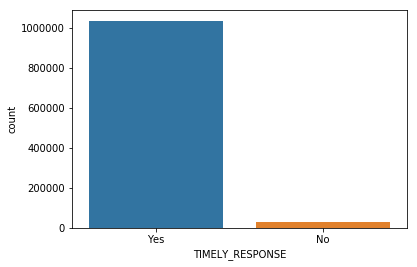

In [11]:
sns.countplot(x="TIMELY_RESPONSE", data=DATA)

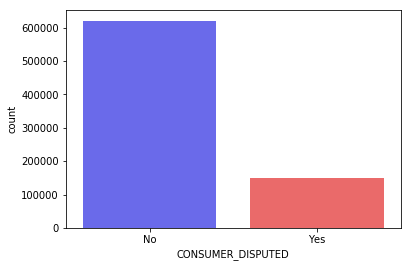

In [12]:
sns.countplot(x="CONSUMER_DISPUTED", data=DATA, palette="seismic")

Let's take a look at complaints about Bank of America in California by product type

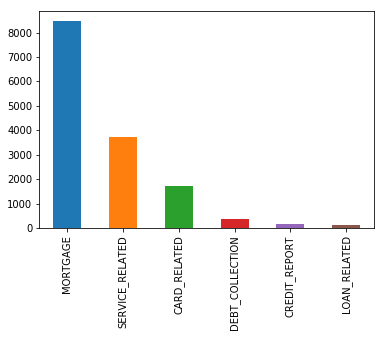

In [13]:
DATA[(DATA.Company=="BANK OF AMERICA, NATIONAL ASSOCIATION") & (DATA.State=="CA")]['PRO_TYPE'].value_counts().plot(kind='bar')

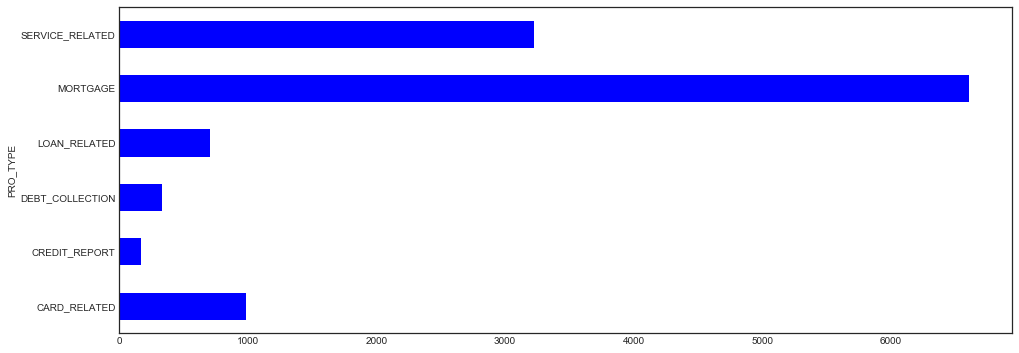

In [19]:
DATA[(DATA.Company=="WELLS FARGO & COMPANY") & (DATA.State=="CA")].groupby(["PRO_TYPE"]).size().plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

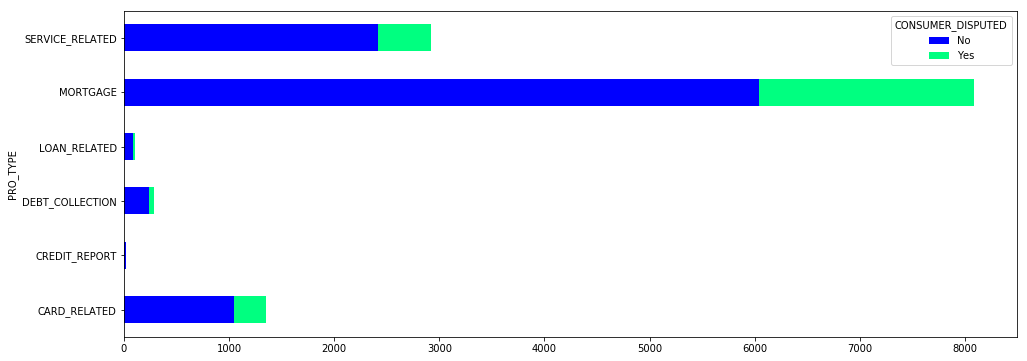

In [4]:
DATA[(DATA.Company=="BANK OF AMERICA, NATIONAL ASSOCIATION") & (DATA.State=="CA")].groupby(["PRO_TYPE", "CONSUMER_DISPUTED" ]).size().unstack().plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

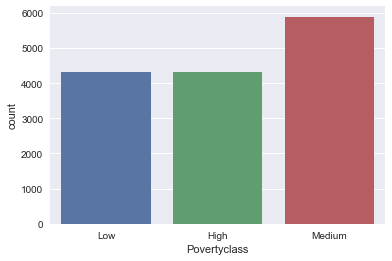

In [17]:
sns.countplot(x="Povertyclass", data=DATA[(DATA.Company=="BANK OF AMERICA, NATIONAL ASSOCIATION") & (DATA.State=="CA")])